# Demonstration of Bias Triangle Feature Pipeline on data from a FinFet device

Minimum parameters are

__res:__ Resolution factor

__min_area:__ Minimum contour area (to remove outliers)

__thr_method:__ Image Thresholding Method (_'noisy_binary'_ preferred for dataset with gaps, _'triangle'_ for better-defined close-ups)

__denoising (bool):__ Applies denoising as preprocessing 

__allow_MET (bool):__ In case of disconnected contours (i.e. bias triangles with distinct gaps), employs Minimum 
    Enclosing Triangle(MET), instead of a variation of the Ramer-Douglas-Peucker (RDP) algorithm
    
__direction:__ User-supplied direction of bias triangles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
from typing import Tuple

In [2]:
imgs = np.load('finfets_imgs.npy', allow_pickle=True)
labels = np.load('finfets_labels.npy', allow_pickle=True)

In [3]:
import btriangle_detection, btriangle_properties

def bias_triangle_pipeline(img: np.ndarray, res: int, min_area: int, thr_method: str, denoising: bool, allow_MET: bool, direction: str) -> None:

    gray_orig, ims, masks = btriangle_detection.triangle_segmentation_alg(img, res = res, min_area = min_area, thr_method = thr_method, denoising = denoising, allow_MET = allow_MET, direction =direction)

    base, corner_pts, c_im = btriangle_properties.detect_base(gray_orig, masks, 'down')
    angles, angl_img = btriangle_properties.compute_angles(gray_orig, np.array(corner_pts), 'MET')

    print('The angles (as per MET) in degrees are ', angles)

    exc_state, line_mask = btriangle_properties.get_excited_state(gray_orig, base,'down', tol = 0.3)
    #ex_line = exc_state[-1]
    idx = np.argsort(exc_state[:, 1])
    exc_state = exc_state[idx, :]

    median_line = len(idx)//2
    ex_line = exc_state[median_line]

    contour, _ = cv.findContours(masks,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    intersection = btriangle_properties.extract_triangle_seg(gray_orig, base, ex_line, contour[0])
    _, _ , tr_int = btriangle_properties.extract_props(intersection, gray_orig)

    _, _ , tr_int_all = btriangle_properties.extract_props(contour[0], gray_orig)

    blank = gray_orig.copy()
    seg_im = cv.drawContours(blank, [intersection], -1,(255,0,255), thickness=1)

    axes_points,axes,line_img = btriangle_properties.detect_detuning_axis(gray_orig, base, corner_pts)

    print('The mean intensity of the segment is', tr_int, 'while the mean intensity of the triangle is', tr_int_all)
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6),sharex=True, sharey=True)

    ax[0,0].imshow(gray_orig) 
    ax[0,0].axis('off') 
    ax[0,0].set_title('Original') 

    
    ax[0,1].imshow(ims[0]) 
    ax[0,1].axis('off') 
    ax[0,1].set_title('Segmentation') 

    ax[0,2].imshow(masks) 
    ax[0,2].axis('off') 
    ax[0,2].set_title('Mask') 


    ax[0,3].imshow(c_im) 
    ax[0,3].axis('off') 
    ax[0,3].set_title('Corner Points & Base') 

    ax[1,0].imshow(angl_img) 
    ax[1,0].axis('off') 
    ax[1,0].set_title('Convex Enclosing Triangle (MET)') 


    ax[1,1].imshow(line_mask) 
    ax[1,1].axis('off') 
    ax[1,1].set_title('Detected lines') 

    ax[1,2].imshow(seg_im) 
    ax[1,2].axis('off') 
    ax[1,2].set_title('Triangle Segment')

    ax[1,3].imshow(line_img) 
    ax[1,3].axis('off') 
    ax[1,3].set_title('Detected Detuning Axes')

    fig.tight_layout()
    
    return fig

# Example 1

The angles (as per MET) in degrees are  [40.9130418465525, 56.62637236793392, 82.46058578551359]
The mean intensity of the segment is 35.433341984600744 while the mean intensity of the triangle is 38.21826398501751


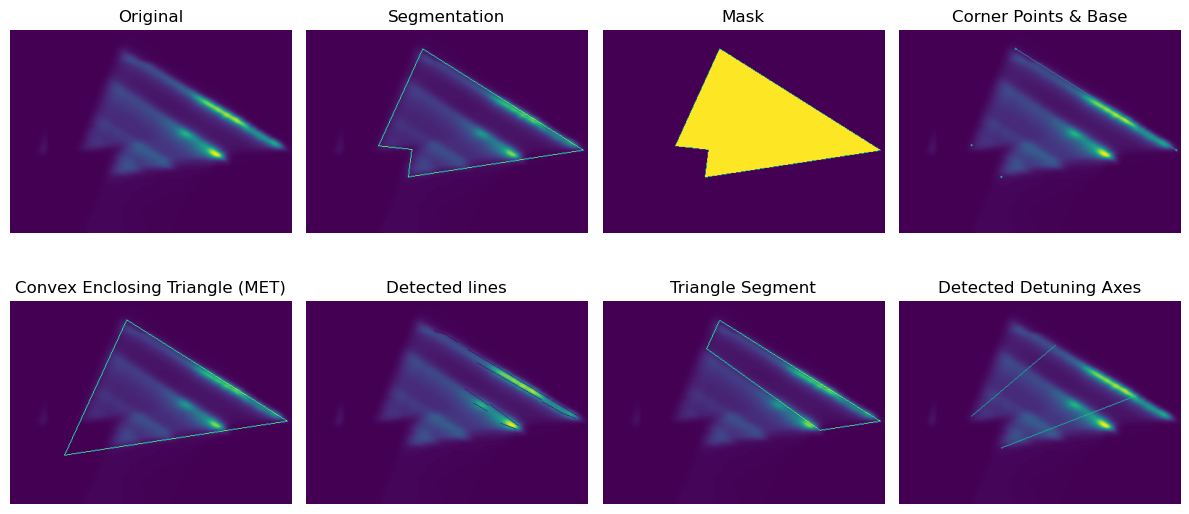

In [5]:
bias_triangle_pipeline(imgs[2][1],res = 2, min_area = 15, thr_method = 'noisy_binary', denoising = True, allow_MET = True, direction = 'down')
plt.show()

# Example 2

The angles (as per MET) in degrees are  [83.1660001311708, 43.98275450528992, 52.85124536353928]
The mean intensity of the segment is 88.5458025704129 while the mean intensity of the triangle is 72.0086241637785


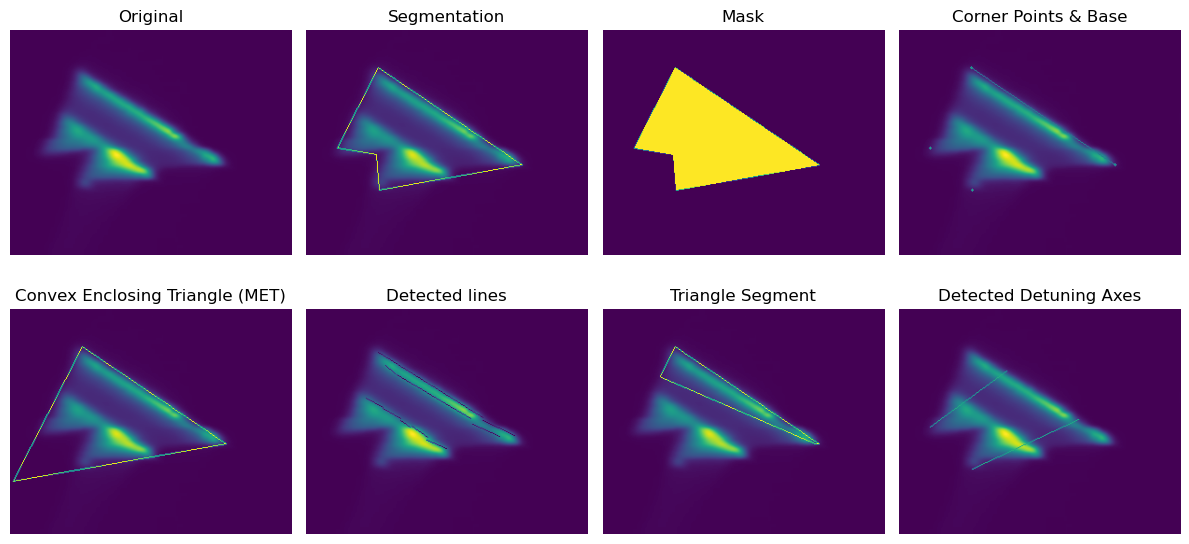

In [6]:
bias_triangle_pipeline(imgs[4][1],res = 2, min_area = 15, thr_method = 'noisy_binary', denoising = True, allow_MET = True, direction = 'down')
plt.show()

# Example 3

The angles (as per MET) in degrees are  [40.39072864724999, 56.1396241908196, 83.4696471619304]
The mean intensity of the segment is 27.078771695594124 while the mean intensity of the triangle is 42.00753541645735


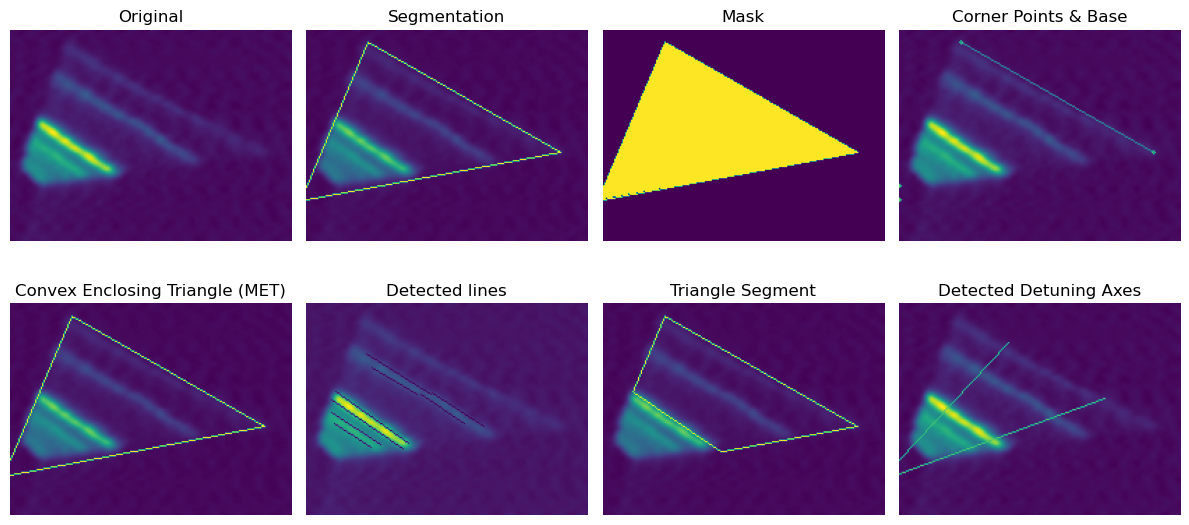

In [7]:
bias_triangle_pipeline(imgs[16][1],res = 2, min_area = 15, thr_method = 'noisy_binary', denoising = True, allow_MET = True, direction = 'down')
plt.show()

# Example 4

The angles (as per MET) in degrees are  [39.73415968822089, 62.85622325731425, 77.40961705446486]
The mean intensity of the segment is 83.44674556213018 while the mean intensity of the triangle is 52.62169919632606


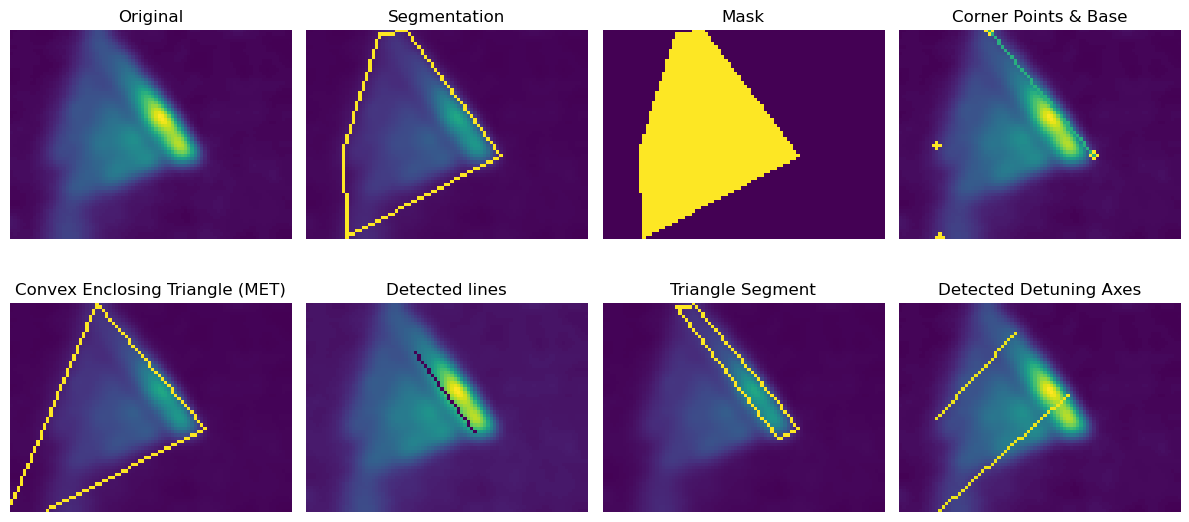

In [8]:
bias_triangle_pipeline(imgs[35][1],res = 2, min_area = 15, thr_method = 'noisy_binary', denoising = True, allow_MET = True, direction = 'down')
plt.show()

# Example 5

The angles (as per MET) in degrees are  [90.01046116101449, 44.12952964706832, 45.8600091919172]
The mean intensity of the segment is 40.80124929017604 while the mean intensity of the triangle is 57.55527817403709


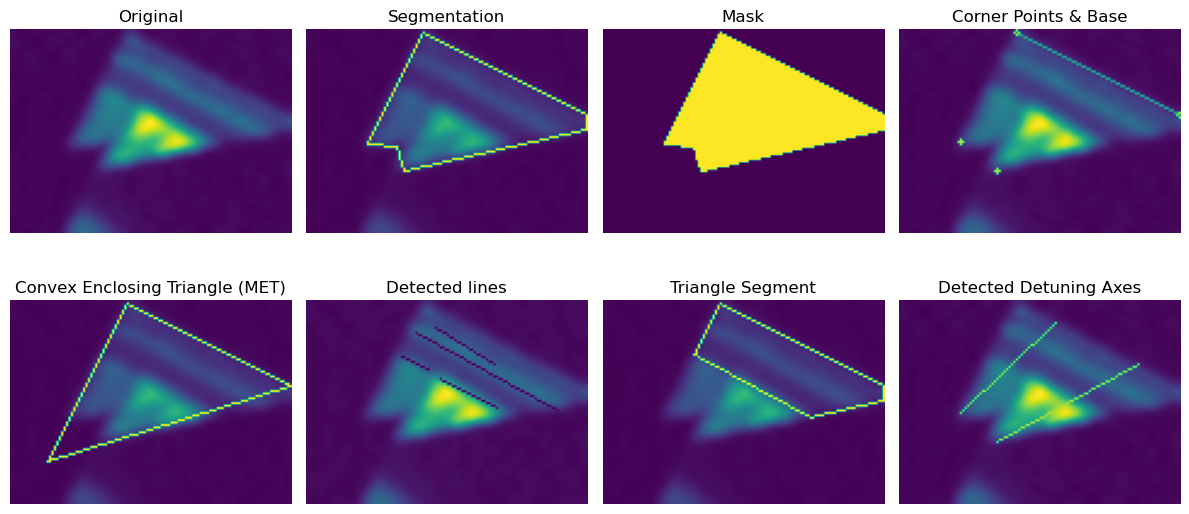

In [9]:
bias_triangle_pipeline(imgs[25][1],res = 2, min_area = 200, thr_method = 'noisy_binary', denoising = True, allow_MET = True, direction = 'down')
plt.show()

# Example 6

The angles (as per MET) in degrees are  [31.521587533585528, 62.13733071480568, 86.34108175160881]
The mean intensity of the segment is 29.8000456516777 while the mean intensity of the triangle is 37.93554840734348


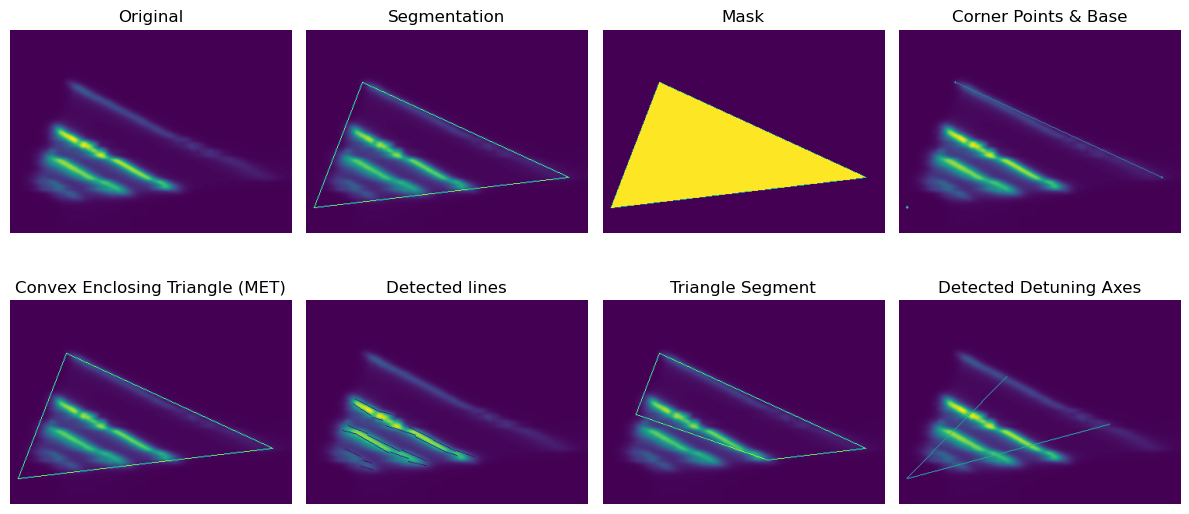

In [10]:
bias_triangle_pipeline(imgs[0][1],res = 2, min_area = 15, thr_method = 'noisy_binary', denoising = True, allow_MET = True, direction = 'down')
plt.show()

# Detection of Pauli Spin Blockade (PSB)
We detect PSB by comparing the averaged intensities per triangle segment (respectively normalized by total triangle intensity). We determine the segment on the detected mask of the unblocked bias triangle by selecting the base and the median of the detected (excited state) lines as boundaries. Then we compare it to the intensity of the blocked bias triangle. Normalization is conducted with respect to the complete triangle average intensity (respectively) to account for uniform variations in intensity.

The parameter _int_tol_ specifies the minimum deviation in intensity above which PSB is detected, while the parameter _slope_tol_ specifies the maximum deviation in absolute value between slopes of detected (excited state) lines.

In [11]:
import sklearn.metrics

PSB_List = []
intensity_pairs = []

for j in range(len(imgs)):

    unblocked, ims, masks = btriangle_detection.triangle_segmentation_alg(imgs[j][1],res = 2,min_area = 310, thr_method = 'noisy_binary', denoising = True, allow_MET = True, direction = 'down')
    base, corner_pts, c_im = btriangle_properties.detect_base(unblocked, masks, 'down')

    blocked,ims2, masks2 = btriangle_detection.triangle_segmentation_alg(imgs[j][0],res = 2,min_area = 310, thr_method = 'noisy_binary', denoising = True,allow_MET = True, direction = 'down')
    
    pair, PSB = btriangle_detection.PSB_detector(unblocked, blocked, base, masks, 'down', slope_tol = 0.4, int_tol = 0.05)  
    intensity_pairs.append(pair)
    
    PSB_List.append(int(PSB))
    
PSB_N = np.array(PSB_List)    
acc = sklearn.metrics.accuracy_score(labels, PSB_N)

print('The PSB detector is ',round(acc*100,2),'% accurate in',round(len(PSB_N)/len(imgs)*100,2),'% of the data.')        

/Users/madeleine/Downloads/btriangle_properties.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


No lines found, potentially increase tolerance for slope deviation.
No lines found, potentially increase tolerance for slope deviation.
No lines found, potentially increase tolerance for slope deviation.
No lines found, potentially increase tolerance for slope deviation.
No lines found, potentially increase tolerance for slope deviation.
The PSB detector is  86.79 % accurate in 100.0 % of the data.
